In [6]:
%matplotlib inline
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as pl
from matplotlib import patches
import pandas as pd
import pulp
import re

In [7]:
puzzle = [
    [1,2,2],
    [1,5,3],
    [1,8,4],
    [2,1,6],
    [2,9,3],
    [3,3,4],
    [3,7,5],
    [4,4,8],
    [4,6,6],
    [5,1,8],
    [5,5,1],
    [5,9,6],
    [6,4,7],
    [6,6,5],
    [7,3,7],
    [7,7,6],
    [8,1,4],
    [8,9,8],
    [9,2,3],
    [9,5,4],
    [9,8,2],
] # values are 1-indexed because they came from a MATLAB blog

mpuzzle = np.zeros((9, 9), dtype=int) # matrix representation for use when drawing the solution
for n in puzzle:
    mpuzzle[n[0]-1, n[1]-1] = n[2]

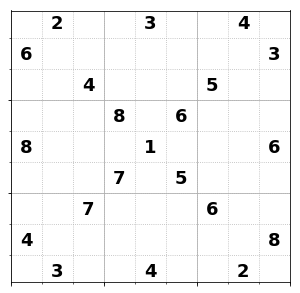

In [8]:
pl.figure(figsize=(5,5))
ax = pl.axes()
pl.axis('equal')
pl.xlim(0,9)
pl.ylim(0,9)
ax.xaxis.set_major_locator(mp.ticker.MultipleLocator(3))
ax.xaxis.set_minor_locator(mp.ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(mp.ticker.MultipleLocator(3))
ax.yaxis.set_minor_locator(mp.ticker.MultipleLocator(1))
ax.grid(True, which='Major', linestyle='-')
ax.grid(True, which='Minor', linestyle=':')
ax.set_xticklabels([])
ax.set_yticklabels([])

for n in puzzle:
    ax.text(0.3+n[1]-1, 8.3-n[0]+1, n[2], size=18, weight='extra bold')

In [9]:
var = np.empty((9, 9, 9), dtype=pulp.LpVariable) # numpy arrays can hold anything!
for ii in range(9):
    for jj in range(9):
        for kk in range(9):
            var[ii,jj,kk] = pulp.LpVariable(
                'n{}{}_{}'.format(ii,jj,kk+1), cat='Binary')

In [10]:
prob = pulp.LpProblem('Sudoku Solver')

# define sudoku rules independent of puzzle
for ii in range(9):
    for jj in range(9):
        # each space must have exactly one number
        prob += var[ii,jj,:].sum() == 1
        # quantity in each row must be 1
        prob += var[ii,:,jj].sum() == 1
        # quantity in each col must be 1
        prob += var[:,ii,jj].sum() == 1
        # quantity in each block must be 1
        r = (ii//3)*3 # integer division returns floor of float equivalent
        c = (ii%3)*3
        prob += var[r:r+3,c:c+3,jj].sum() == 1
        
# specify constraints from this puzzle
for c in puzzle:
    prob += var[c[0]-1,c[1]-1,c[2]-1] == 1

In [11]:
prob.solve()
print('Status: {}'.format(pulp.LpStatus[prob.status]))

Status: Optimal


In [12]:
values = np.array([int(x.varValue) for x in prob.variables()[1:]]) # w/o dummy variable
names = np.array([x.name for x in prob.variables()[1:]])
values = values.reshape((9, 9, 9))
values *= (np.arange(9)+1).reshape((1,1,9))
values = values.sum(axis=2)

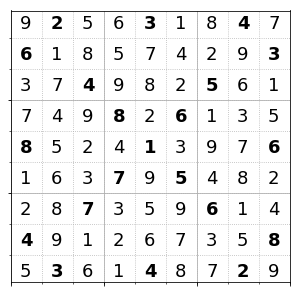

In [13]:
pl.figure(figsize=(5,5))
ax = pl.axes()
pl.axis('equal')
pl.xlim(0,9)
pl.ylim(0,9)
ax.xaxis.set_major_locator(mp.ticker.MultipleLocator(3))
ax.xaxis.set_minor_locator(mp.ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(mp.ticker.MultipleLocator(3))
ax.yaxis.set_minor_locator(mp.ticker.MultipleLocator(1))
ax.grid(True, which='Major', linestyle='-')
ax.grid(True, which='Minor', linestyle=':')
ax.set_xticklabels([])
ax.set_yticklabels([])

for ii in range(9):
    for jj in range(9):
        if mpuzzle[ii,jj]!=0:
            ax.text(0.3+jj, 8.3-ii, mpuzzle[ii,jj], size=18, weight='extra bold')
        else:
            ax.text(0.3+jj, 8.3-ii, values[ii,jj], size=18, weight='light')